<center>

# Hypertension risk classification ML Project

</center>

https://www.kaggle.com/datasets/khan1803115/hypertension-risk-model-main/

### Hypertension risk dataset objectives
- Establish a classification model for prediction model for hypertension risk and assess its performance metrics
- Establish critical features correlated to hypertension risk

### Dataset overview

In [1]:
import pandas as pd

hypertension_data = pd.read_csv('Hypertension-risk-model-main.csv', sep=',')

initial_rows_count = hypertension_data.shape[0]
print(initial_rows_count, "rows in the dataset")
hypertension_data.head()

4240 rows in the dataset


male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0     1   39              0         0.0     0.0         0    195.0  106.0   
1     0   46              0         0.0     0.0         0    250.0  121.0   
2     1   48              1        20.0     0.0         0    245.0  127.5   
3     0   61              1        30.0     0.0         0    225.0  150.0   
4     0   46              1        23.0     0.0         0    285.0  130.0   

   diaBP    BMI  heartRate  glucose  Risk  
0   70.0  26.97       80.0     77.0     0  
1   81.0  28.73       95.0     76.0     0  
2   80.0  25.34       75.0     70.0     0  
3   95.0  28.58       65.0    103.0     1  
4   84.0  23.10       85.0     85.0     0

#### Assumptions
- heartRate feature indicates the heart rate in an **idle** state (no prior effort)

In [2]:
class F:
    isMale = 'male'
    age = 'age'
    smoking = 'currentSmoker'
    cigs_per_day = 'cigsPerDay'
    weight = 'BPMeds'
    systolic = 'Systolic Blood Pressure'
    diastolic = 'Diastolic Blood Pressure'
    cholesterol = 'Cholesterol Level'
    glucose = 'Glucose Level'
    smoking = 'Smoking'
    alcohol = 'Alcohol Consumption'
    active = 'Active Lifestyle'
    cardio = 'Cardiovascular Disease'
    
feature_names = [v for k,v in vars(F).items() if not k.startswith('__')][1:-1]

In [3]:
## Formatting utility

ansi = {
    'bold': '\033[1m',
    'underline': '\033[4m',
    'end': '\033[0m',
    'red': '\033[91m',
}

def bold(text):
    return ansi['bold'] + str(text) + ansi['end']

def bold_red(text):
    return ansi['bold'] + ansi['red'] + str(text) + ansi['end']

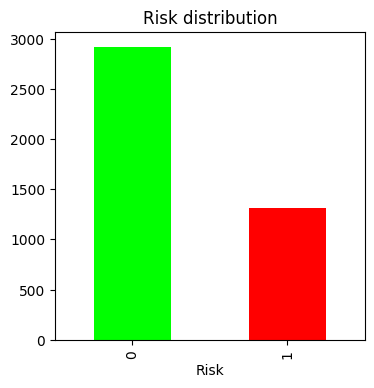

In [4]:
hypertension_data.groupby('Risk').size().plot(title='Risk distribution', x='Risk', kind='bar',
                                              color=['#00FF00','#FF0000'], figsize=(4, 4));

## Data preparation

#### Missing values cleanup

In [29]:
import numpy as np

## TODO: draw a bar plot for the distribution of missing values in the dataset (see comment below)

# Check for all columns to be numeric
assert all(np.issubdtype(hypertension_data[col].dtype, np.number) for col in hypertension_data.columns), "Not all rows are numeric"

# Check for missing values in data (NaN or None)
missing_values_any = hypertension_data.isnull().any(axis=1)
missing_values_df = pd.DataFrame(hypertension_data.isnull().sum(), columns=['Count']).T
if missing_values_any.sum() != 0:
    print(f"{bold_red(missing_values_any.sum())} rows ({missing_values_df.sum(axis=1).values[0]} total NA values) with missing values in the data out of {hypertension_data.shape[0]}")
    display(missing_values_df)
    # missing_values_df.plot(title='Missing values distribution', y='Count', kind='bar');
else:
    print("No missing values in the data")

489 rows (540 total NA values) with missing values in the data out of 4240


male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
Count     0    0              0          29      53         0       50      0   

       diaBP  BMI  heartRate  glucose  Risk  
Count      0   19          1      388     0

147 (11.2%) patients with high risk of hypertension have missing values in the data


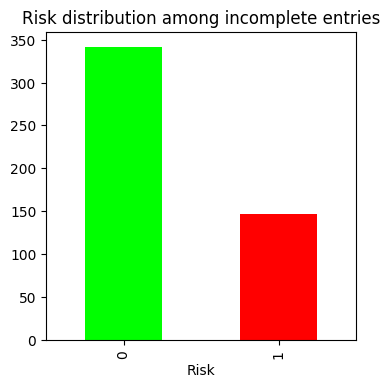

In [269]:
missing_data_high_risk_count = hypertension_data[missing_values_any & hypertension_data['Risk'] == 1].shape[0]
high_risk_count = hypertension_data[hypertension_data['Risk'] == 1].shape[0]
percentage = round(missing_data_high_risk_count / high_risk_count * 100, 1)
print(missing_data_high_risk_count, f"({percentage}%) patients with high risk of hypertension have missing values in the data")

hypertension_data[missing_values_any].groupby('Risk').size().plot(title='Risk distribution among incomplete entries', x='Risk', kind='bar',
                                              color=['#00FF00','#FF0000'], figsize=(4, 4));

In [270]:
hypertension_data.dropna(inplace=True)
print("Removed", initial_rows_count - hypertension_data.shape[0], "entries out of", initial_rows_count, "with brute-force approach (dropping rows with missing values)")
print(hypertension_data.shape[0], "entries left in the dataset")

Removed 489 entries out of 4240 with brute-force approach (dropping rows with missing values)
3751 entries left in the dataset


In [202]:
# Check for duplicate entries
duplicates = hypertension_data.duplicated().sum()
if duplicates != 0:
    print(f"{bold_red(duplicates)} duplicate entries found in the data")
else:
    print("No duplicate entries found in the data")

No duplicate entries found in the data


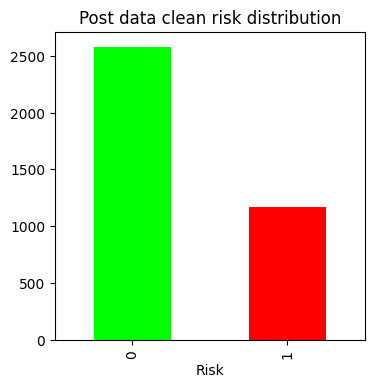

In [203]:
hypertension_data.groupby('Risk').size().plot(title='Post data clean risk distribution', x='Risk', kind='bar',
                                              color=['#00FF00','#FF0000'], figsize=(4, 4));

# Pie chart
# hypertension_data.groupby('Risk').size().plot(kind='pie', labels=['Low risk', 'High risk'], autopct='%1.1f%%', startangle=90,
#                  title='Proportion of Patients with High Risk', legend=False, figsize=(4, 4));

#### Outliers exploration

In [204]:
hypertension_data.describe().round(2)

male      age  currentSmoker  cigsPerDay   BPMeds  diabetes  \
count  3751.00  3751.00        3751.00     3751.00  3751.00   3751.00   
mean      0.45    49.57           0.49        9.01     0.03      0.03   
std       0.50     8.57           0.50       11.93     0.17      0.16   
min       0.00    32.00           0.00        0.00     0.00      0.00   
25%       0.00    42.00           0.00        0.00     0.00      0.00   
50%       0.00    49.00           0.00        0.00     0.00      0.00   
75%       1.00    56.00           1.00       20.00     0.00      0.00   
max       1.00    70.00           1.00       70.00     1.00      1.00   

       totChol    sysBP    diaBP      BMI  heartRate  glucose     Risk  
count  3751.00  3751.00  3751.00  3751.00    3751.00  3751.00  3751.00  
mean    236.93   132.37    82.94    25.81      75.70    81.88     0.31  
std      44.61    22.05    11.93     4.07      11.96    23.88     0.46  
min     113.00    83.50    48.00    15.54      44.00    40.00     0.00  
25%     206.00   117.00    75.00    23.08      68.00    71.00     0.00  
50%     234.00   128.00    82.00    25.41      75.00    78.00     0.00  
75%     264.00   144.00    90.00    28.06      82.00    87.00     1.00  
max     696.00   295.00   142.50    56.80     143.00   394.00     1.00

In [205]:
# hypertension_data[hypertension_data["Risk"] == 0].describe().round(2)
# hypertension_data[hypertension_data["Risk"] == 1].describe().round(2)

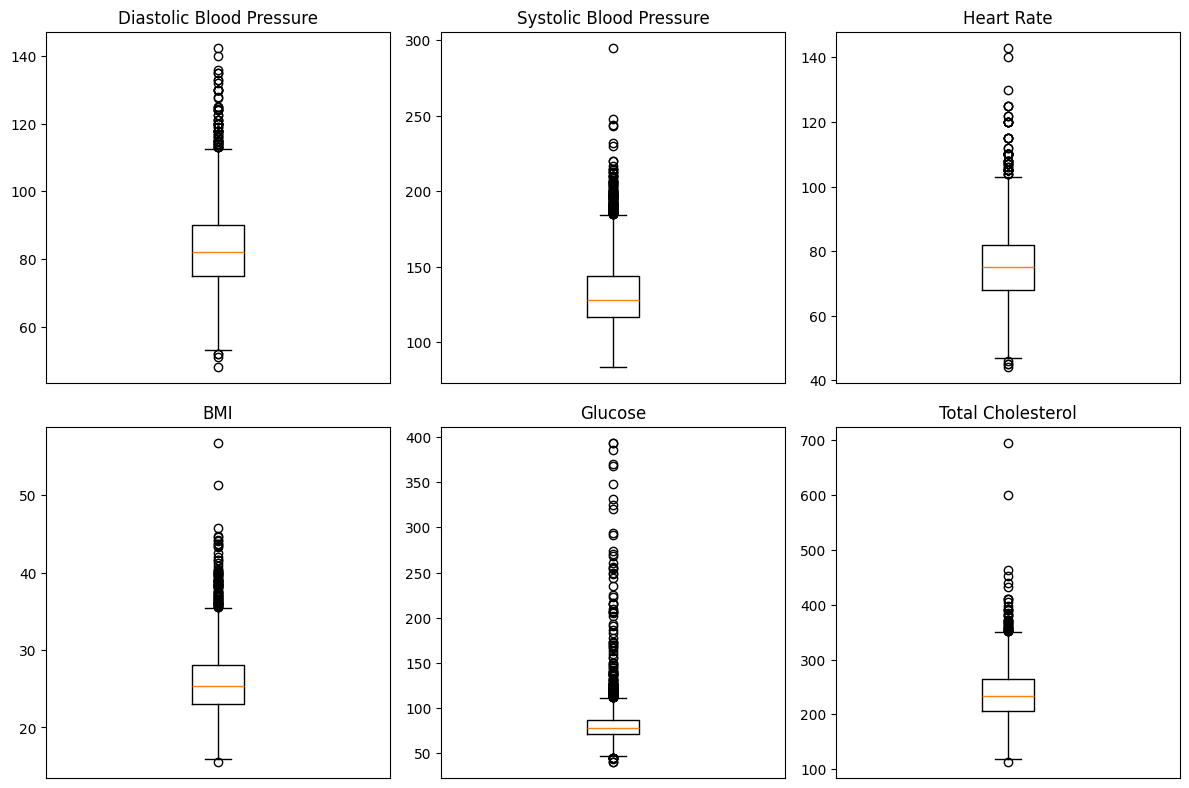

In [206]:
# Univariate analysis to find outliers

# hypertension_data['totChol'].plot(kind='box', title='Total Cholesterol Distribution', figsize=(4, 4));
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plot diaBP
axes[0, 0].boxplot(hypertension_data['diaBP'])
axes[0, 0].set_title('Diastolic Blood Pressure')
axes[0, 0].xaxis.set_visible(False)

# Plot sysBP
axes[0, 1].boxplot(hypertension_data['sysBP'])
axes[0, 1].set_title('Systolic Blood Pressure')
axes[0, 1].xaxis.set_visible(False)

# Plot heart rate
axes[0, 2].boxplot(hypertension_data['heartRate'])
axes[0, 2].set_title('Heart Rate')
axes[0, 2].xaxis.set_visible(False)

# Plot BMI
axes[1, 0].boxplot(hypertension_data['BMI'])
axes[1, 0].set_title('BMI')
axes[1, 0].xaxis.set_visible(False)

# Plot glucose
axes[1, 1].boxplot(hypertension_data['glucose'])
axes[1, 1].set_title('Glucose')
axes[1, 1].xaxis.set_visible(False)

axes[1, 2].boxplot(hypertension_data['totChol'])
axes[1, 2].xaxis.set_visible(False)
axes[1, 2].set_title('Total Cholesterol')

# Remove empty subplot
# fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


Z-score (**data point's variability**) explanation: https://www.investopedia.com/terms/z/zscore.asp

99.7% of normally distributed data lies within 3 standard deviations (a Z-score between -3.0 and 3.0), and 95% within 2 sd.

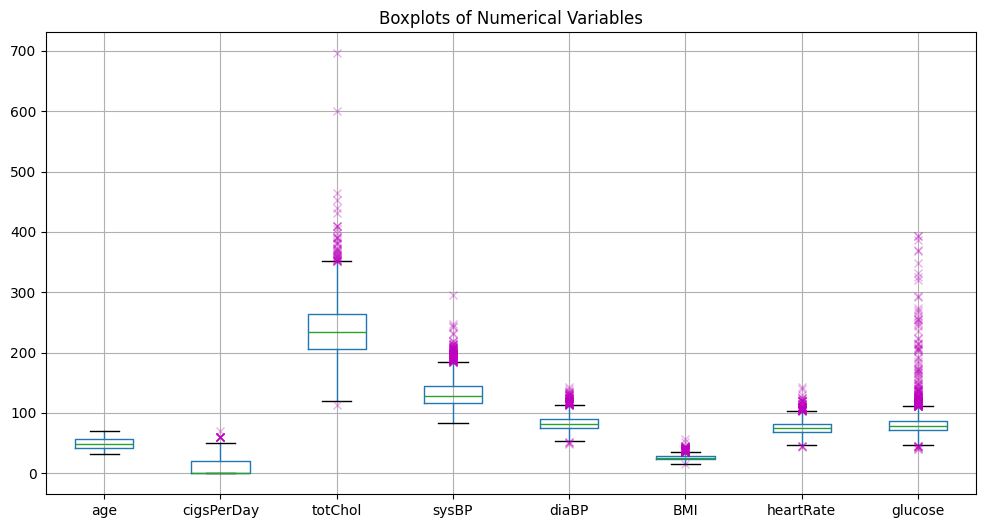

Number of outliers detected using Z-Score method: 205
Number of outliers detected using IQR method: 469
199 outliers detected by Z-Score method are also detected by IQR method


In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import zscore

## TODO: Seperate boxplots into subplots like above

# Boxplots
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
fliers = hypertension_data[numerical_columns].boxplot(figsize=(12, 6), sym='xm', whis=1.5, flierprops=dict(alpha=0.3), return_type='dict')["fliers"]
plt.title('Boxplots of Numerical Variables') ## TODO: rename graph title
plt.show()

# Z-Score outlier detection
z_scores = zscore(hypertension_data[numerical_columns])
outliers_zscore = (np.abs(z_scores) > 3).any(axis=1)
outliers_zscore_count = outliers_zscore.sum()
print(f"Number of outliers detected using Z-Score method: {outliers_zscore_count}")

# Interquartile Range (IQR) outlier detection
whiskers = 1.5
Q1 = hypertension_data[numerical_columns].quantile(0.25)
Q3 = hypertension_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((hypertension_data[numerical_columns] < (Q1 - whiskers * IQR)) |
                (hypertension_data[numerical_columns] > (Q3 + whiskers * IQR))).any(axis=1)
outliers_iqr_count = outliers_iqr.sum()
print(f"Number of outliers detected using IQR method: {outliers_iqr_count}")

# IQR and Z-score outlier detection results comparison
zscore_in_IQR = hypertension_data[outliers_zscore].isin(hypertension_data[outliers_iqr]).any(axis=1).sum()
print(f"{zscore_in_IQR} outliers detected by Z-Score method are also detected by IQR method")

In [208]:
total_outliers = 0
for i, flier in enumerate(fliers):
    feature_outliers = flier.get_ydata().shape[0]
    print(f"{numerical_columns[i]}: {feature_outliers}")
    # print(flier.get_ydata())
    total_outliers += feature_outliers

print("Total number of outliers detected by", bold("boxplot method:"), total_outliers)

age: 0
cigsPerDay: 11
totChol: 42
sysBP: 110
diaBP: 69
BMI: 86
heartRate: 81
glucose: 181
Total number of outliers detected by boxplot method: 580


To justify : why choose IQR outliers and not Z-score outliers also ?

Number of rows after removing outliers: 3282 (removed 469 outliers)


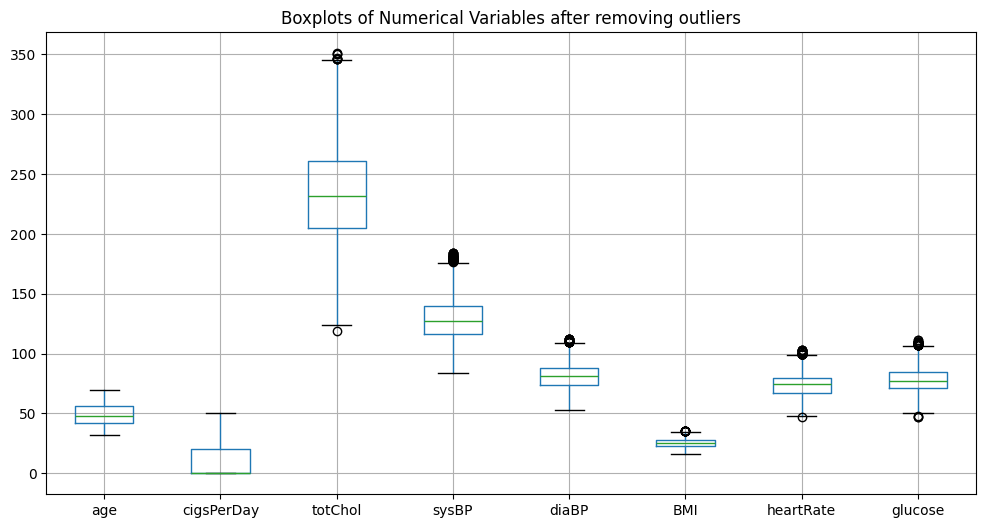

In [209]:
# Remove outliers using IQR method
hypertension_data = hypertension_data[~outliers_iqr]

# Verify the number of rows after removing outliers
print("Number of rows after removing outliers:", hypertension_data.shape[0], "(removed", outliers_iqr_count, "outliers)")

# Boxplots after removing outliers
hypertension_data[numerical_columns].boxplot(figsize=(12, 6))
plt.title('Boxplots of Numerical Variables after removing outliers');

In [189]:
import pandas as pd

# Calculate the std of the cleaned dataset with IQR method
iqr_cleaned_std = hypertension_data.std()

zscore_cleaned_std = hypertension_data[~outliers_zscore].std()

# Calculate the std of the dataset before cleaning
initial_std = hypertension_data.std()

# Create a dataframe with the std values
std_df = pd.DataFrame({'std(Initial dataset)': initial_std,'std(IQR cleaned dataset)': iqr_cleaned_std,
                       'std(Z-score cleaned dataset)': zscore_cleaned_std}).transpose().loc[:,numerical_columns]

std_df

age  cigsPerDay    totChol      sysBP  \
std(Initial dataset)          8.570204   11.925097  44.611594  22.046522   
std(IQR cleaned dataset)      8.469350   11.697621  40.605766  18.047054   
std(Z-score cleaned dataset)  8.524943   11.543403  41.744576  19.627955   

                                  diaBP       BMI  heartRate    glucose  
std(Initial dataset)          11.932779  4.065599  11.956382  23.882233  
std(IQR cleaned dataset)      10.421813  3.476829  10.664089  11.004231  
std(Z-score cleaned dataset)  10.954423  3.620859  11.342434  13.386597

#### Bivariate analysis

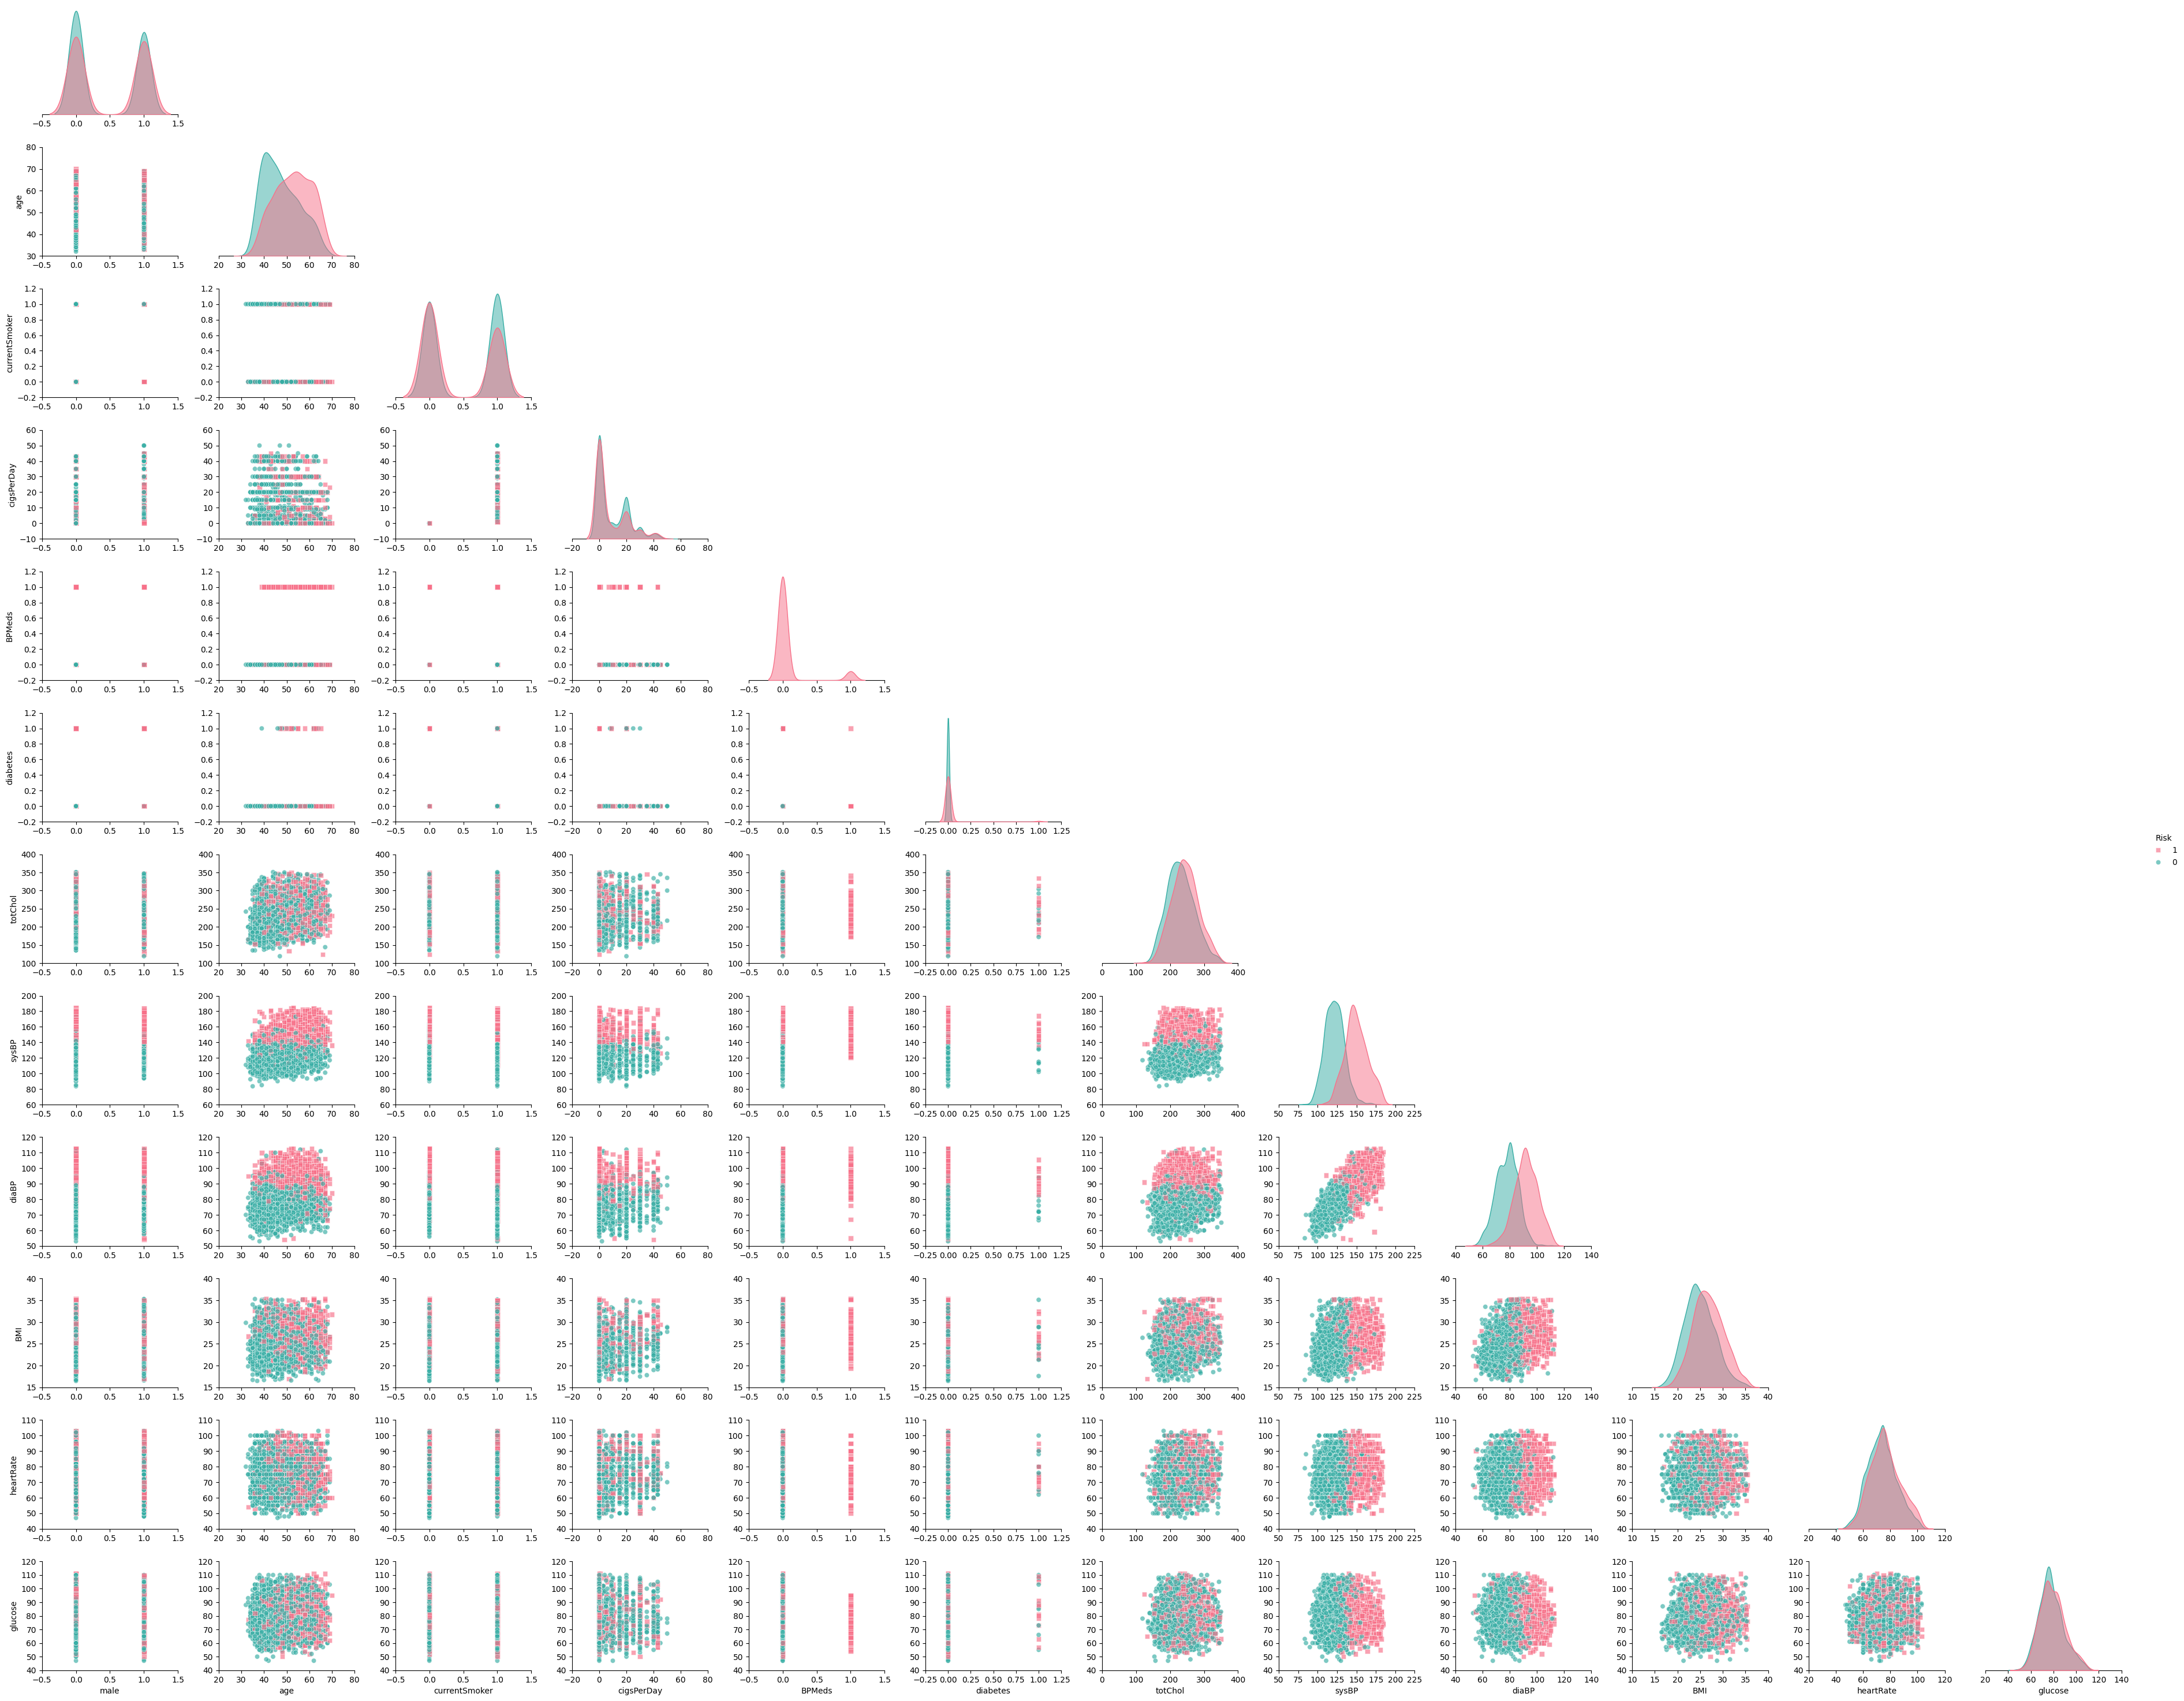

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.pairplot(hypertension_data, hue="Risk", palette="husl", corner=True, hue_order=[1, 0], plot_kws={'alpha': 0.65},
                 diag_kws={'common_norm': False, 'fill': True, 'alpha': 0.5}, markers=['o', 's'], height=2.5, aspect=1.25)
                 #diag_kind='hist', diag_kws={'bins': 10})

# Add ticks with numbers to axes on every subplot
for ax in g.axes.flat:
  if ax is not None:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())

plt.subplots_adjust(wspace=0.3, hspace=0.3)


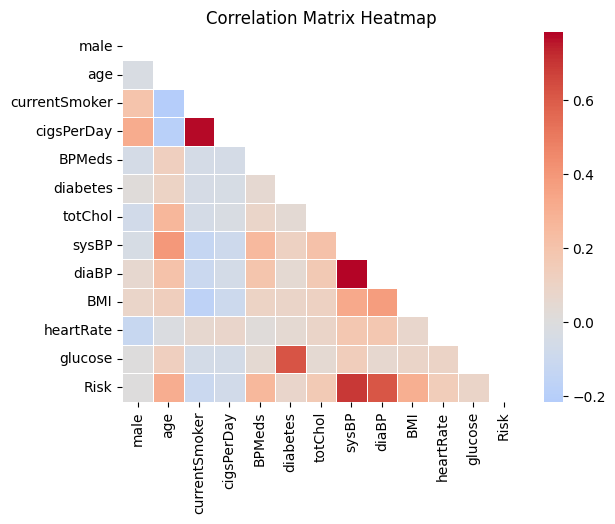

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = hypertension_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False, center=0, linewidths=0.5, fmt=".1f")

plt.title('Correlation Matrix Heatmap')
plt.show()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

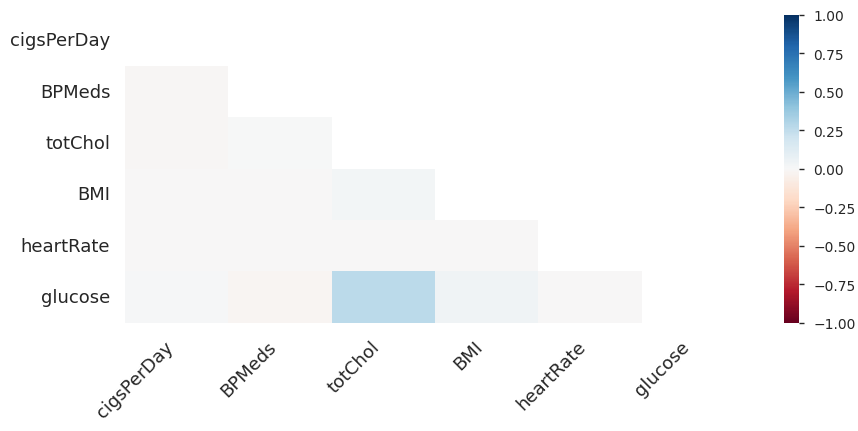

In [16]:
from ydata_profiling import ProfileReport

# Generate the data profiling report (https://github.com/ydataai/ydata-profiling)

profile = ProfileReport(hypertension_data, title='Hypertension Data Profiling Report', explorative=True)
profile